<a href="https://colab.research.google.com/github/katya123123/ML-labs/blob/main/ML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

df = pd.read_csv("agricultural_yield_test.csv")
df_train = pd.read_csv("agricultural_yield_train.csv")

df

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374
...,...,...,...,...,...,...,...
3995,95.094714,1,124.108262,98.970659,496.705800,5,802.209345
3996,53.256984,0,100.310322,111.448947,667.056391,8,509.646540
3997,94.145522,1,196.473704,110.003474,458.241408,3,776.013634
3998,61.452120,1,80.618357,97.815517,778.652540,4,502.319484


Целевая переменная - soil_quality

In [106]:
X_test = df
Y_test = df.Soil_Quality
X_test = X_test.drop('Soil_Quality', axis=1)
X_train = df_train
Y_train = df_train.Soil_Quality
X_train = X_train.drop('Soil_Quality', axis=1)


In [107]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['category']).columns

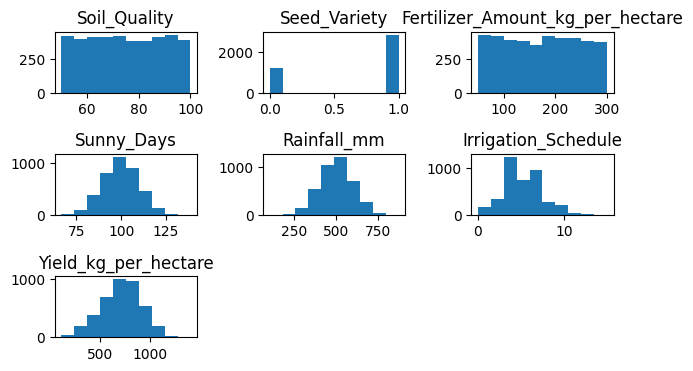

In [108]:
for i, column in enumerate(num_columns, 1):
  plt.subplot(4, 3, i)
  plt.hist(df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

МОжно предположить, что переменная fertilizer_amount_kg_per_hectare влияет на переменную soil_quality

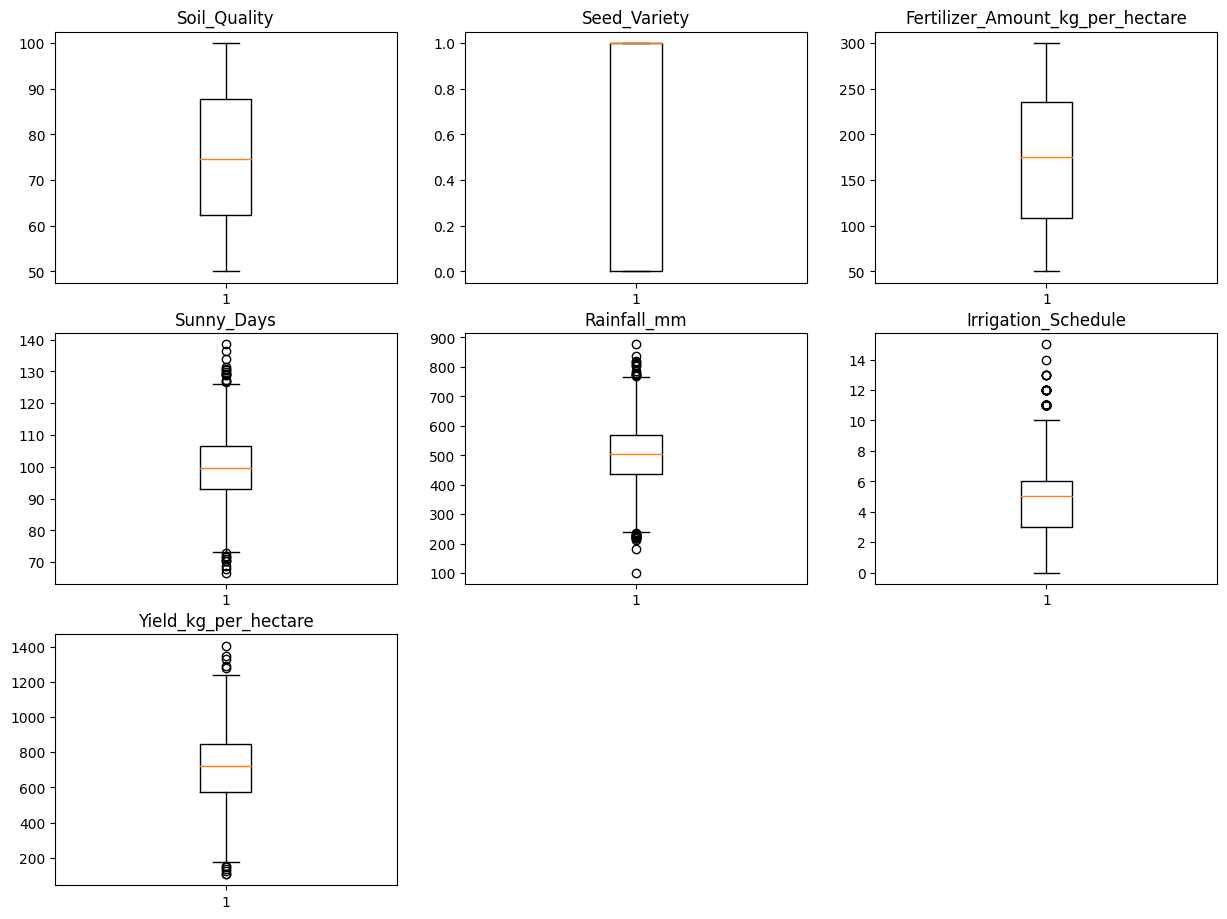

In [109]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
  plt.subplot(4, 3, i)
  plt.boxplot(data=df, x=column)
  plt.title(column)

plt.show()

In [110]:
fig= px.imshow(df_train.corr(), text_auto=True )
fig.show()

На целевую переменную все параметры имеют достаточно маленькое влияние. Однако, среди маленького наибольшее влияние оказывает fertilizer_Amount_kg_per_hectare и yield_kg_per_hectare и sunny_days  и rainfall_mm

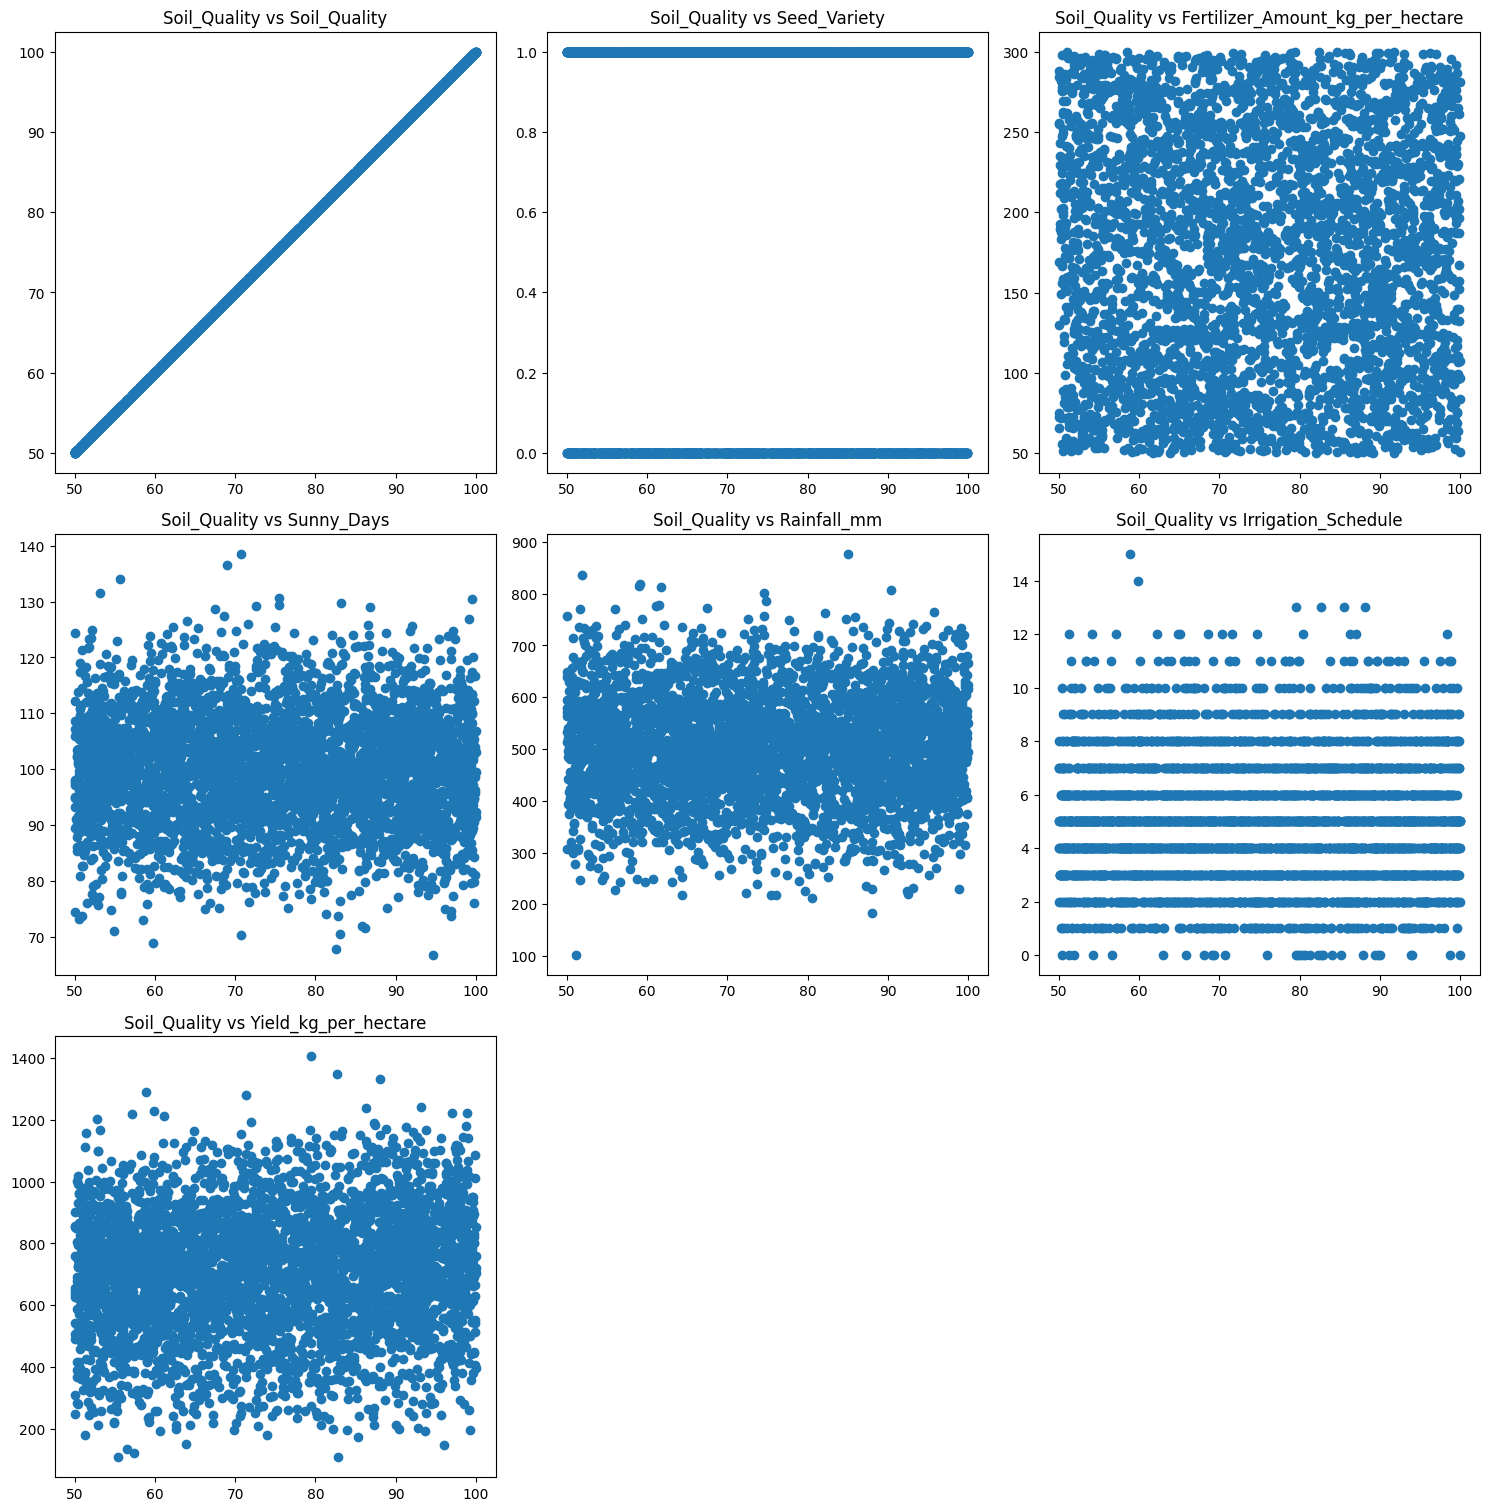

In [111]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    plt.scatter(data=df, x='Soil_Quality', y=column)
    plt.title(f'Soil_Quality vs {column}')

plt.tight_layout()
plt.show()

Как мы видим, выделенные переменные действительно имеют определенную зависимость с целевой переменной, поэтому их можно взять для обучения модели,за исключением переменной fertilese.

In [112]:
df_feat = df[['Sunny_Days', 'Rainfall_mm', 'Yield_kg_per_hectare']]
df_feat

,Sunny_Days,Rainfall_mm,Yield_kg_per_hectare
0,96.670922,602.386237,278.986563
1,99.007556,466.518251,836.434840
2,104.844272,510.320495,785.881787
3,90.136191,354.350914,807.884526
4,101.221668,443.993788,1064.542374
...,...,...,...
3995,98.970659,496.705800,802.209345
3996,111.448947,667.056391,509.646540
3997,110.003474,458.241408,776.013634
3998,97.815517,778.652540,502.319484


In [118]:
from sklearn.preprocessing import StandardScaler

df_transformed = df_feat.copy()

scaler = StandardScaler()
scale = scaler.fit_transform(df_transformed)

df_feat = pd.DataFrame(scale, columns=['Sunny_Days', 'Rainfall_mm', 'Yield_kg_per_hectare'])
pd.concat([df_feat, df['Soil_Quality']], axis=1)

df_train_transform = df_train[['Sunny_Days','Rainfall_mm', 'Yield_kg_per_hectare']].copy()

scale_train = scaler.fit_transform(df_train_transform)

df_train_feat = pd.DataFrame(scale_train, columns=['Sunny_Days', 'Rainfall_mm', 'Yield_kg_per_hectare'])
df_train_feat


,Sunny_Days,Rainfall_mm,Yield_kg_per_hectare
0,-0.534440,-0.562263,-0.149554
1,-0.944175,0.170481,-0.174501
2,-0.260358,-0.801688,1.091430
3,1.350364,0.472624,0.948756
4,-1.691294,-0.657619,0.907917
...,...,...,...
15995,0.319436,-1.805051,1.200676
15996,2.371729,1.466779,0.819383
15997,0.238554,0.138373,1.082220
15998,1.505851,1.943933,0.869113


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

x_test = df_feat
y_test = df['Soil_Quality']
x_train = df_train_feat[['Rainfall_mm', 'Sunny_Days', 'Yield_kg_per_hectare']]
y_train = df_train['Soil_Quality']

def compute_regression(x, y):
  model = LinearRegression()
  model.fit(x, y)

  return model

def compute_metrics(y, predicted):
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2' : r2,
      'mape': mape*100,
  }


print(x_train)


       Rainfall_mm  Sunny_Days  Yield_kg_per_hectare
0        -0.562263   -0.534440             -0.149554
1         0.170481   -0.944175             -0.174501
2        -0.801688   -0.260358              1.091430
3         0.472624    1.350364              0.948756
4        -0.657619   -1.691294              0.907917
...            ...         ...                   ...
15995    -1.805051    0.319436              1.200676
15996     1.466779    2.371729              0.819383
15997     0.138373    0.238554              1.082220
15998     1.943933    1.505851              0.869113
15999     0.902142   -0.161724             -0.787823

[16000 rows x 3 columns]


In [120]:
model = compute_regression(x_train, y_train)
y_pred = model.predict(x_train)

compute_metrics(y_train, y_pred)

{'MAE': 12.459021508023273,
 'MSE': 208.20795103910643,
 'R2': 0.013640200667533686,
 'mape': 17.65418392247421}